In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargamos el csv que tiene los datos correspondientes a los eventos

In [2]:
events = pd.read_csv('events.csv.gzip', compression = 'gzip')

/home/nadia/.local/share/virtualenvs/notebooks-RwJWnc7b/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


#### En primer lugar queremos observar la distribución de los eventos en el tiempo

#### Chequeamos si las columnas de interés, 'date' y 'event_id' tienen valores nulos o NaN

In [4]:
events.isnull().any()

date                  False
event_id              False
ref_type              False
ref_hash              False
application_id        False
attributed            False
device_countrycode    False
device_os_version      True
device_brand           True
device_model           True
device_city            True
session_user_agent     True
trans_id               True
user_agent             True
event_uuid             True
carrier                True
kind                   True
device_os              True
wifi                   True
connection_type        True
ip_address            False
device_language        True
dtype: bool

In [5]:
events['date'].hasnans

False

In [6]:
events['event_id'].hasnans

False

#### Cambiamos el tipo de dato de la columna 'date' a datetime, y creamos dos nuevas columnas que contengan la fecha y el horario de los eventos por separado

In [7]:
events['date'] = pd.to_datetime(events['date'])
events['just_date'] = pd.to_datetime(pd.to_datetime(events['date']).dt.date)
events['just_time'] = pd.to_datetime(events['date']).dt.time

#### Con un histograma podemos analizar la distribución de los eventos a lo largo del tiempo

/home/nadia/.local/share/virtualenvs/notebooks-RwJWnc7b/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


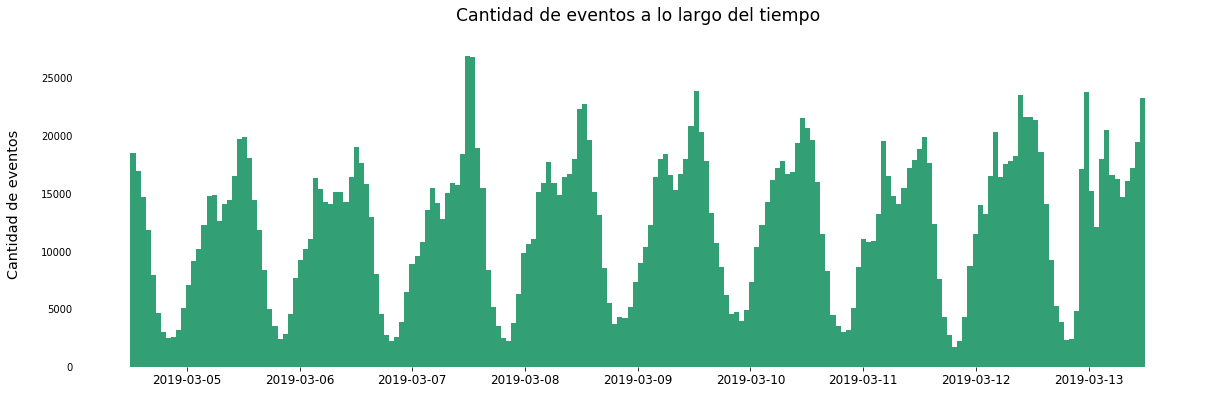

In [8]:
plt.figure(figsize=(20, 6))
plt.hist(events['date'], bins = 200, color = '#008751', alpha = 0.8)

plt.tick_params(top = False, bottom = True, left = False, right = False, labelleft = True, labelbottom = True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks(ticks = [pd.to_datetime('2019-03-05 12:00:00'), pd.to_datetime('2019-03-06 12:00:00'), pd.to_datetime('2019-03-07 12:00:00'), 
                    pd.to_datetime('2019-03-08 12:00:00'), pd.to_datetime('2019-03-09 12:00:00'), pd.to_datetime('2019-03-10 12:00:00'),
                   pd.to_datetime('2019-03-11 12:00:00'), pd.to_datetime('2019-03-12 12:00:00'), pd.to_datetime('2019-03-13 12:00:00')],
           labels = ['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08','2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13'], 
           fontsize = 'large')
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'x-large')
plt.title('Cantidad de eventos a lo largo del tiempo', fontsize = 'xx-large', pad = 20)


plt.show()

#### Los eventos parecen seguir un patron cíclico, repitiéndose a lo largo de cada día.

#### Si miramos la cantidad de eventos por día

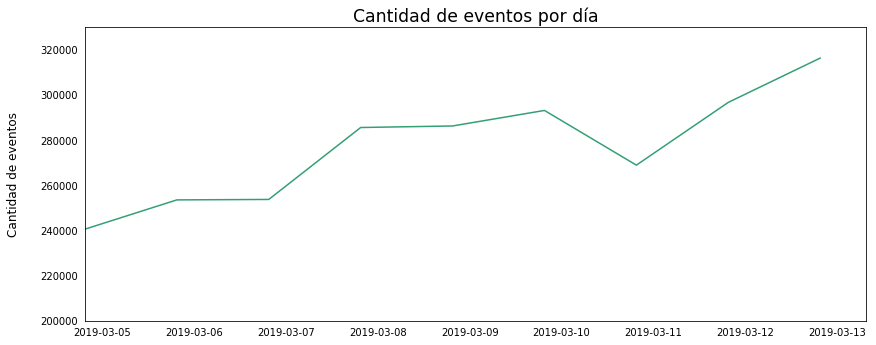

In [9]:
plt.figure(figsize=(14, 6))
events['just_date'].value_counts().plot(color = '#008751', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [pd.to_datetime('2019-03-05 12:00:00'), pd.to_datetime('2019-03-06 12:00:00'), pd.to_datetime('2019-03-07 12:00:00'), 
                                  pd.to_datetime('2019-03-08 12:00:00'), pd.to_datetime('2019-03-09 12:00:00'), pd.to_datetime('2019-03-10 12:00:00'),
                   pd.to_datetime('2019-03-11 12:00:00'), pd.to_datetime('2019-03-12 12:00:00'), pd.to_datetime('2019-03-13 12:00:00')],
           labels = ['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08','2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13'], 
           fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos por día', fontsize = 'xx-large')
plt.ylim(200000, 330000)
plt.show();

#### Y la cantidad de eventos por hora

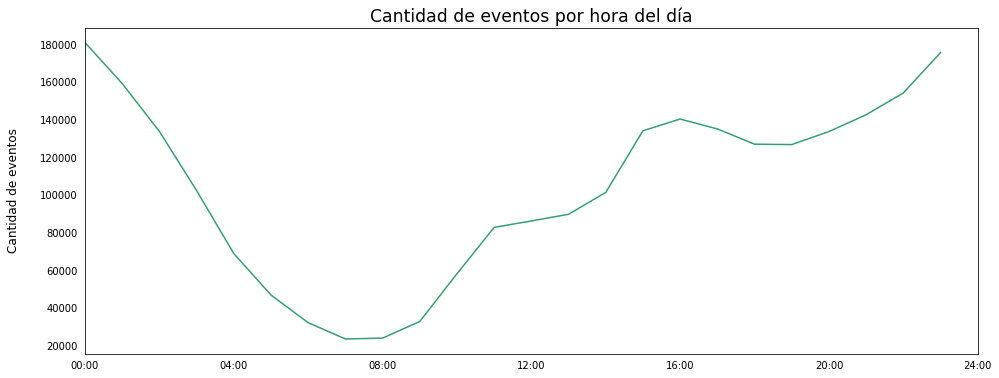

In [10]:
fig = plt.figure(figsize=(16, 6))
events['date'].groupby(events['date'].dt.hour).count().plot(kind = 'line', color = '#008751', alpha = 0.8)

plt.xticks(rotation = 0, ticks = [0, 4, 8, 12, 16, 20, 24], labels = ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos por hora del día', fontsize = 'xx-large')
plt.xlabel('')
plt.show();

#### Encontramos que la cantidad de eventos se distribuyen de manera bastante homogénea a lo largo de los 9 días, mientras que dentro de cada día presentan un máximo alrededor de las 23-00 hs, y un mínimo alrededor de las 7-8 hs.

#### Nos preguntamos entonces, si este patrón se presenta por igual para todos los tipos de eventos

#### ¿Cuántos tipos de eventos existen?

In [11]:
len(events['event_id'].value_counts())

568

#### ¿Cómo es su distribución?

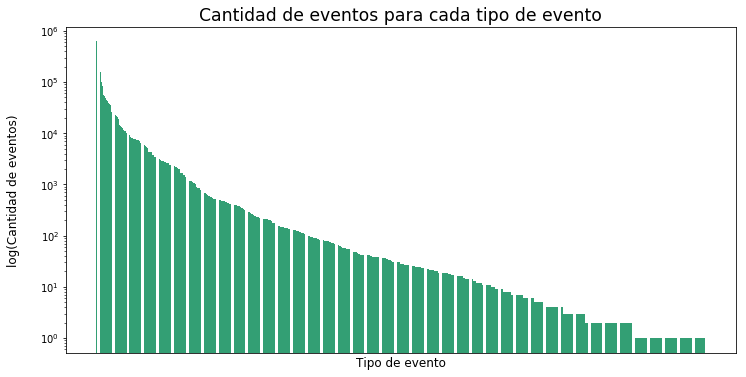

In [12]:
plt.figure(figsize=(12, 6))
vals = events['event_id'].value_counts().values
ix = events['event_id'].value_counts().index
sted = sorted(zip(vals, ix), reverse=True)
_vals, _ix = zip(*sted)

plt.bar(range(len(_ix)), _vals, color = '#008751', alpha = 0.8)
plt.yscale('log')
plt.ylabel('log(Cantidad de eventos)', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos para cada tipo de evento', fontsize = 'xx-large')
plt.xlabel('Tipo de evento', fontsize = 'large')
plt.xticks([])
plt.show()

#### Vemos que mientras algunos tipos de eventos dan cuenta de una gran cantidad de ocurrencias, hay otros muy poco frecuentes. 

#### Para el análisis nos quedaremos con los 10 eventos más frecuentes

In [13]:
most_frequent_events = events['event_id'].value_counts().sort_values(ascending = False).head(10)
most_frequent_events

22     618228
31     417070
161    217846
1      157812
138    100039
162     84898
329     56490
156     53332
33      48581
171     43942
Name: event_id, dtype: int64

#### Estos 10 tipos de eventos corresponden a más del 70% de los eventos totales

In [14]:
most_frequent_events.sum()/len(events['event_id'])

0.7209033912852792

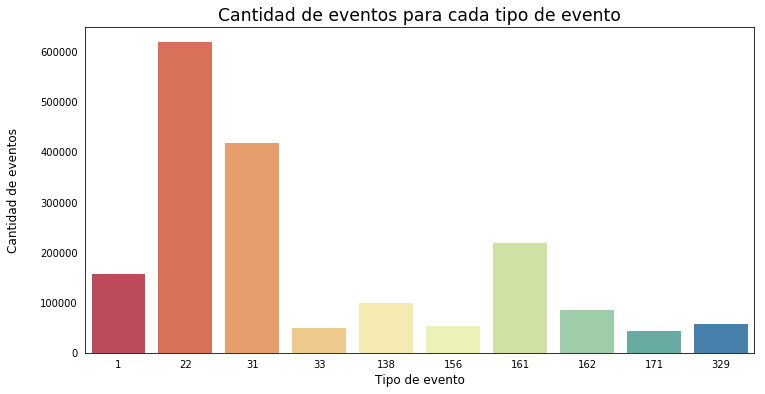

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x = most_frequent_events.index, y = most_frequent_events.values, palette = sns.color_palette("Spectral", 10))

plt.xticks(rotation = 0, fontsize = 'medium')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos para cada tipo de evento', fontsize = 'xx-large')
plt.xlabel('Tipo de evento', fontsize = 'large')
plt.show();

#### Incluso dentro de los 10 eventos mayoritarios, la distribución de las ocurrencias es muy irregular

#### ¿Cómo es la distribución de cada tipo de evento a lo largo del tiempo?

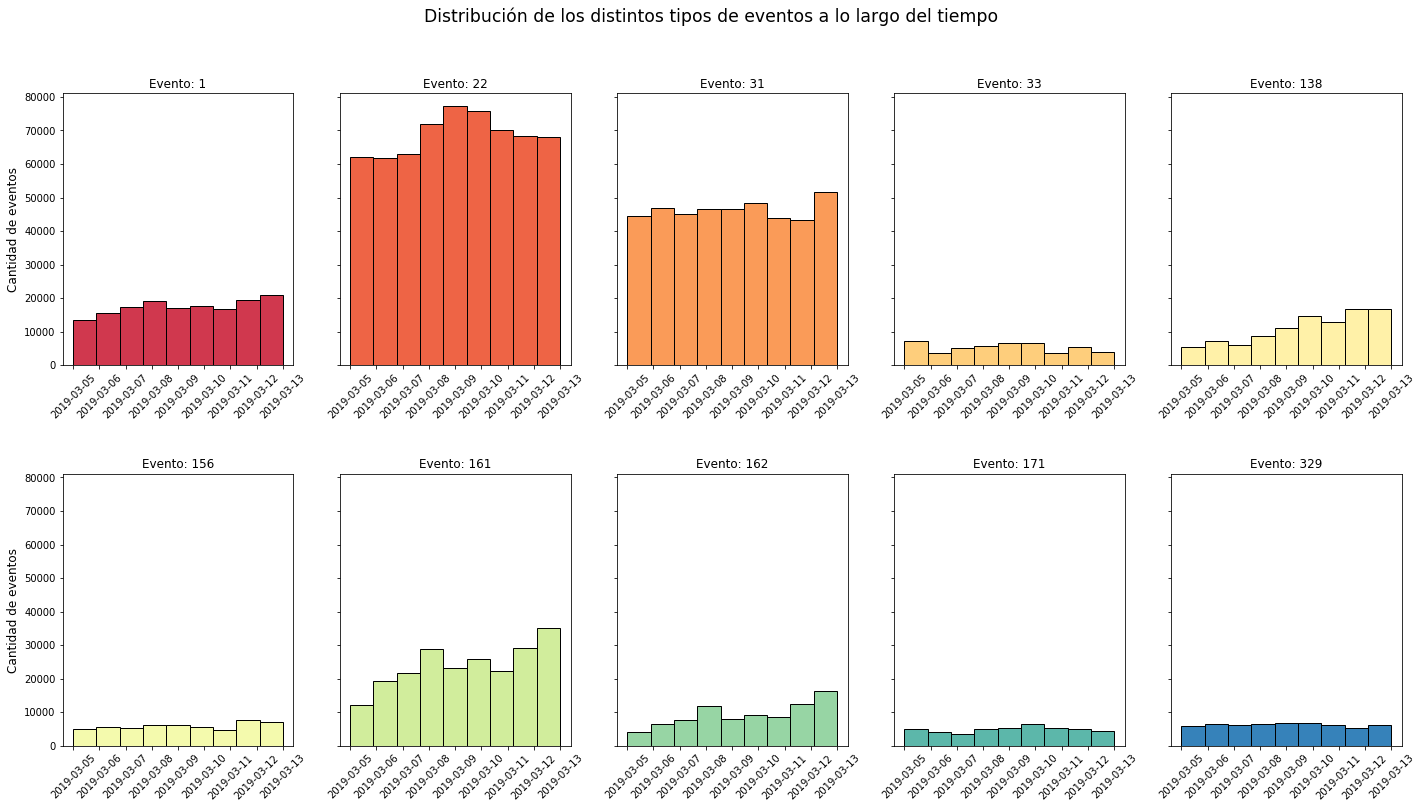

In [17]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (24, 12), sharey = True)
plt.subplots_adjust(hspace = 0.4)

colors = sns.color_palette('Spectral', 10)
_ids = sorted(most_frequent_events.index)

for event_id, ax, c in zip(_ids, [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10], colors):
    ax.set_title('Evento: {}'.format(event_id), fontsize = 'large')
    
    this_event = events[events['event_id'] == event_id]
    ax.hist(this_event['just_date'], bins=len(set(this_event['just_date'])), color = c, edgecolor = 'black')
    ax.tick_params(axis = 'x', labelrotation = 45)
    
ax1.set_ylabel('Cantidad de eventos', fontsize = 'large');
ax6.set_ylabel('Cantidad de eventos', fontsize = 'large');
fig.suptitle('Distribución de los distintos tipos de eventos a lo largo del tiempo', fontsize = 'xx-large');

#### Las ocurrencias para los distintos tipos de eventos parecen distribuirse homogéneamente a lo largo del tiempo

#### Nos preguntamos cómo son las atribuciones a Jampp para cada tipo de evento

In [18]:
filtered_by_events = events[events['event_id'].isin(most_frequent_events.index)]

In [19]:
by_event_id = filtered_by_events.groupby(events['event_id']).attributed.sum()
attributed_percentages = by_event_id/filtered_by_events['event_id'].value_counts()*100

In [20]:
attributed_percentages

1      0.107723
22     0.001779
31     0.373079
33     0.000000
138    0.009996
156    1.095027
161    0.000000
162    0.000000
171    0.000000
329    0.001770
dtype: float64

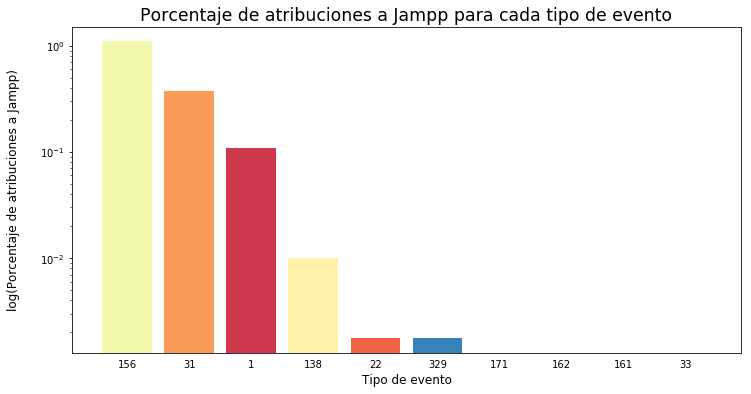

In [21]:
plt.figure(figsize=(12, 6))
vals = attributed_percentages.values
ix = attributed_percentages.index
sted = sorted(zip(vals, ix), reverse=True)
_vals, _ix = zip(*sted)
ordered_colors = ('#f4faad', '#fa9b58', '#d0384e', '#fff1a8', '#ee6445', '#3682ba', '#5cb7aa', '#97d5a4', '#d1ed9c', '#fece7c')

plt.bar(range(len(_ix)), _vals, color = ordered_colors)
plt.yscale('log')
plt.ylabel('log(Porcentaje de atribuciones a Jampp)', labelpad = 20, fontsize = 'large')
plt.title('Porcentaje de atribuciones a Jampp para cada tipo de evento', fontsize = 'xx-large')
plt.xticks(range(len(_ix)), _ix)
plt.tick_params(top = False, bottom = False, left = True, right = False, labelleft = True, labelbottom = True)
plt.xlabel('Tipo de evento', fontsize = 'large')
plt.show()

#### Podemos observar que para el evento de id 156, las atribuciones a Jampp son mayores, siendo de un orden de magnitud mayor que el evento que le sigue en ocurrencias

#### ¿Podría haber eventos con menor cantidad de ocurrencias, pero con mayor porcentaje de atribución a Jampp?

#### Buscamos los eventos con mayores atribuciones a Jampp
#### Nota: decidimos enfocarnos en los eventos con mayor frecuencia de atribución, en lugar de aquellos con mayor porcentaje de atribución. Eventos con altos porcentajes de atribución muchas veces correspondían a eventos muy poco frecuentes (por ejemplo 100% de atribución para un tipo de evento que se registra una sola vez), por lo que preferimos trabajar con muestras un poco más grandes.

In [22]:
most_attributed_events = events.groupby(events['event_id']).attributed.sum()
most_attributed_events = most_attributed_events.sort_values(ascending = False).head(10)
most_attributed_events

event_id
31     1556.0
513    1004.0
156     584.0
155     398.0
158     294.0
133     214.0
41      213.0
1       170.0
40      129.0
204     100.0
Name: attributed, dtype: float64

In [23]:
filtered_by_most_attributed = events[events['event_id'].isin(most_attributed_events.index)]

In [24]:
most_attributed_percentages = most_attributed_events/filtered_by_most_attributed['event_id'].value_counts()*100
most_attributed_percentages

1      0.107723
31     0.373079
40     1.554404
41     2.901512
133    1.932454
155    1.034707
156    1.095027
158    1.238521
204    2.656748
513    7.916732
dtype: float64

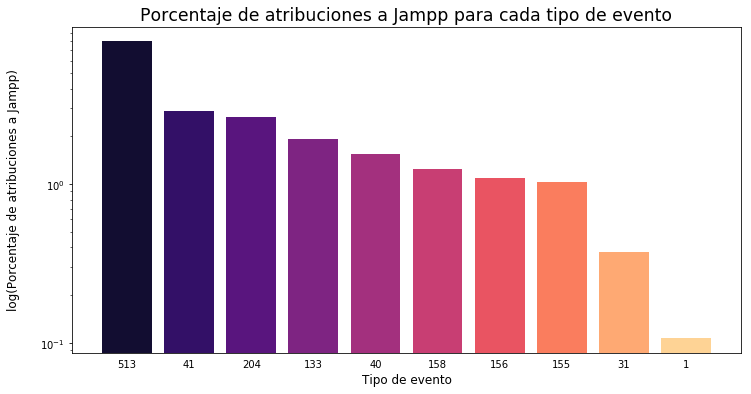

In [25]:
plt.figure(figsize=(12, 6))

vals = most_attributed_percentages.values
ix = most_attributed_percentages.index
sted = sorted(zip(vals, ix), reverse=True)
_vals, _ix = zip(*sted)

plt.bar(range(len(_ix)), _vals, color = sns.color_palette("magma", 10))
#sns.barplot(x = most_attributed_percentages.index, y = most_attributed_percentages.values, palette = sns.color_palette("magma", 10))
plt.yscale('log')
plt.ylabel('log(Porcentaje de atribuciones a Jampp)', labelpad = 20, fontsize = 'large')
plt.title('Porcentaje de atribuciones a Jampp para cada tipo de evento', fontsize = 'xx-large')
plt.tick_params(top = False, bottom = False, left = True, right = False, labelleft = True, labelbottom = True)
plt.xlabel('Tipo de evento', fontsize = 'large')
plt.xticks(range(len(_ix)), _ix)
plt.show()

#### Vemos que mientras algunos de los eventos con más ocurrencias son también los que brindan mayores porcentajes de atribución, también existen otros eventos minoritarios que son mayormente atribuídos a Jampp. 
#### Dado que nos interesan principalmente el subset de eventos que han sido atribuídos, no nos centraremos en los tipos de eventos más frecuentes, sino en aquellos que presentan mayores porcentajes de atribución.

#### De ahora en más, utilizaremos el dataset con información de los 10 eventos con mayores atribuciones a Jampp.


#### Como siguiente paso, nos propusimos analizar los datos provenientes de las distintas aplicaciones que brindan sus datos a Jampp. 

#### ¿Cuántas apps reportan información sobre estos eventos?

In [26]:
len(filtered_by_most_attributed['application_id'].value_counts())

133

#### ¿Cómo se distribuye la cantidad de eventos reportados en cada una de ellas?

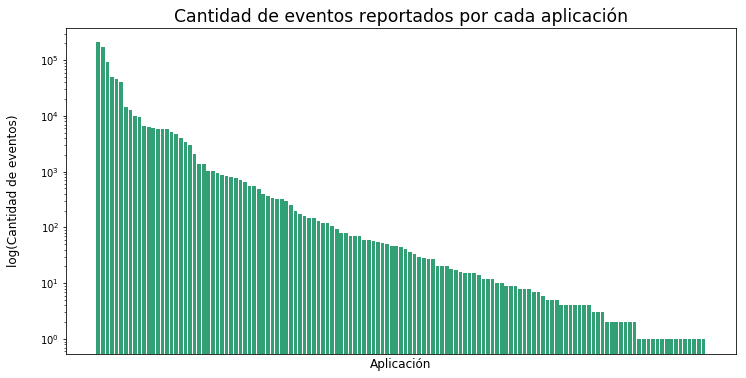

In [27]:
plt.figure(figsize=(12, 6))
vals = filtered_by_most_attributed['application_id'].value_counts().values
ix = filtered_by_events['application_id'].value_counts().index
sted = sorted(zip(vals, ix), reverse=True)
_vals, _ix = zip(*sted)

plt.bar(range(len(_ix)), _vals, color = '#008751', alpha = 0.8)
plt.yscale('log')
plt.ylabel('log(Cantidad de eventos)', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos reportados por cada aplicación', fontsize = 'xx-large')
plt.xlabel('Aplicación', fontsize = 'large')
plt.xticks([])
plt.show()

#### Observamos que al igual que con los tipos de eventos, la cantidad de eventos reportados por cada aplicación se distribuye de manera heterogénea

#### De manera de simplificar el análisis, nos quedamos con las 10 aplicaciones con mayor cantidad de eventos reportados

In [28]:
apps_with_most_events = filtered_by_most_attributed['application_id'].value_counts().head(10)
apps_with_most_events

145    207479
63     172367
212     93153
170     50690
64      46154
103     40595
45      14223
16      12886
102     10051
7        9698
Name: application_id, dtype: int64

#### A través de estas 10 aplicaciones se reportan un 26% del total de los eventos reportados a Jampp

In [29]:
apps_with_most_events.sum()/len(events)

0.26350622969720855

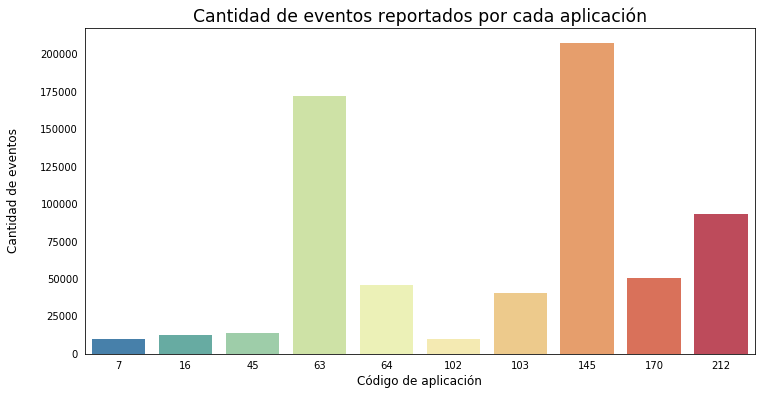

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x = apps_with_most_events.index, y = apps_with_most_events.values, palette = sns.color_palette("Spectral_r", 10))

plt.ylabel('Cantidad de eventos', labelpad = 20, fontsize = 'large')
plt.title('Cantidad de eventos reportados por cada aplicación', fontsize = 'xx-large')
plt.xlabel('Código de aplicación', fontsize = 'large')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.show()

### A continuación nos preguntamos cómo es la distribución de las atribuciones de eventos a Jampp para cada aplicación

#### Filtramos los datos para analizar sólo los eventos provenientes de las aplicaciones con más reportes

In [32]:
filtered_by_app = filtered_by_most_attributed[filtered_by_most_attributed['application_id'].isin(apps_with_most_events.index)]

In [33]:
by_app_id = filtered_by_app.groupby(filtered_by_app['application_id']).attributed.sum()
attributed_by_app = by_app_id/filtered_by_app['application_id'].value_counts()*100

In [34]:
by_app_id

application_id
7        10.0
16     1208.0
45      430.0
63     2245.0
64        0.0
102     140.0
103       0.0
145       0.0
170     320.0
212       0.0
Name: attributed, dtype: float64

In [35]:
attributed_by_app

7      0.103114
16     9.374515
45     3.023272
63     1.302453
64     0.000000
102    1.392896
103    0.000000
145    0.000000
170    0.631288
212    0.000000
dtype: float64

#### Podemos observar que no todas las apps con más reportes presentan eventos atribuídos a Jampp

In [36]:
attr_non_zero = attributed_by_app[attributed_by_app.values != 0]

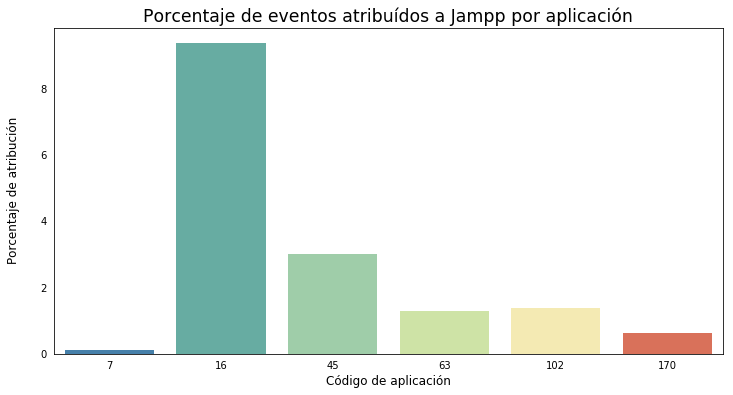

In [37]:
ord_colors = ('#3682ba', '#5cb7aa', '#97d5a4', '#d1ed9c', '#fff1a8', '#ee6445')

plt.figure(figsize=(12, 6))
sns.barplot(x = attr_non_zero.index, y = attr_non_zero.values, palette = ord_colors)

plt.ylabel('Porcentaje de atribución', labelpad = 20, fontsize = 'large')
plt.title('Porcentaje de eventos atribuídos a Jampp por aplicación', fontsize = 'xx-large')
plt.xlabel('Código de aplicación', fontsize = 'large')
plt.tick_params(top = False, bottom = False, left = False, right = False, labelleft = True, labelbottom = True)
plt.show()

In [ ]:
#tengo eventos con mas atribuciones: 513, 41, 204, 133, 40, 158, 156, 155, 31, 1
#apps q reportan los eventos con mas atribuciones: 16, 45, 102, 63, 170, 7
